In [1]:
# Task 1 
# For these task i used the EuroSAT dataset
# The link to the dataset is https://github.com/phelber/EuroSAT?tab=readme-ov-file
# I accessed the dataset directly via tensorflow (tfds.load('eurosat', split=["train", "test"], as_supervised=True, with_info=True))

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import tensorflow_datasets as tfds

In [3]:
# The following code will load the eurosat dataset

dataset, info = tfds.load('eurosat', as_supervised=True, with_info=True)

In [4]:
# This code will convert the dataset in to numpy arrays
# Convert dataset to NumPy arrays
X = []
y = []

for image, label in tfds.as_numpy(dataset['train']):
    X.append(image)
    y.append(label)

X = np.array(X) / 255.0
y = np.array(y)
y = to_categorical(y, num_classes=10)  

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-02-28 02:27:27.433619: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-02-28 02:27:29.047351: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
# My own Convolutional Neural Network(CNN)

def build_custom_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  
    ])
    return model

cnn_model = build_custom_cnn()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# training 
history_cnn = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# evlauting the model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f"Custom CNN - Test Accuracy: {cnn_acc:.4f}")

# I chose the eurosat dataset. It consists of RGB Satellite pictures that are 64 by 64 across 10 land cover classes.

#As for why i chose that exact pattern:The three convolution neural network layers are such that the first layer with 32 filters captures the basic patterns such as edges and textures. The second layer with 64 filters extracts the complex spatial structures. The third layer with 128 filters detects the high-level features such as land types.
# there is a maxpooling layer after each convolution layer which reduces the feature map by half which helps the computational efficiency. The flatten layers convertsthe 3D feature maps into a 1D feature vector. A fully connected layer with 128 neurons with ReLU learns the complex relationships. The final softmax layerwith 10 neurons outputs the class probabilities

# Final evaulation metrics
# It achieved a test accuracy of 0.8543 -> 85%.
# My computer crashed the next time i got 0.8587
#My computer crashed again and now i got 0.8287

/Users/meliksahyorulmazlar/PycharmProjects/Homework 5/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.4001 - loss: 1.5482 - val_accuracy: 0.6628 - val_loss: 0.9594
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.6953 - loss: 0.8320 - val_accuracy: 0.7502 - val_loss: 0.6917
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.7569 - loss: 0.6691 - val_accuracy: 0.7331 - val_loss: 0.7201
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.7910 - loss: 0.5894 - val_accuracy: 0.8063 - val_loss: 0.5601
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.8288 - loss: 0.4851 - val_accuracy: 0.8293 - val_loss: 0.4970
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 31s 45ms/step - accuracy: 0.8442 - loss: 0.4389 - val_accuracy: 0.8467 - val_loss: 0.4324
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 37s 54ms/step - accuracy: 0.8792 - loss: 0.3433 - val_accuracy: 0.8215 - val_loss: 0.5084
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - accuracy: 0.8833 - loss: 0.3348 - 

In [6]:
print("Validation Accuracy:", history_cnn.history['val_accuracy'])
print("Validation Loss:", history_cnn.history['val_loss'])
# These are the results for the validation accuracy and the validation loss.

Validation Accuracy: [0.6627777814865112, 0.7501851916313171, 0.7331481575965881, 0.8062962889671326, 0.8292592763900757, 0.846666693687439, 0.821481466293335, 0.7988888621330261, 0.8431481719017029, 0.8287037014961243]
Validation Loss: [0.9593586325645447, 0.6916834712028503, 0.7201329469680786, 0.560139000415802, 0.49704116582870483, 0.43237048387527466, 0.5084102153778076, 0.5549286007881165, 0.4870345890522003, 0.5133107900619507]


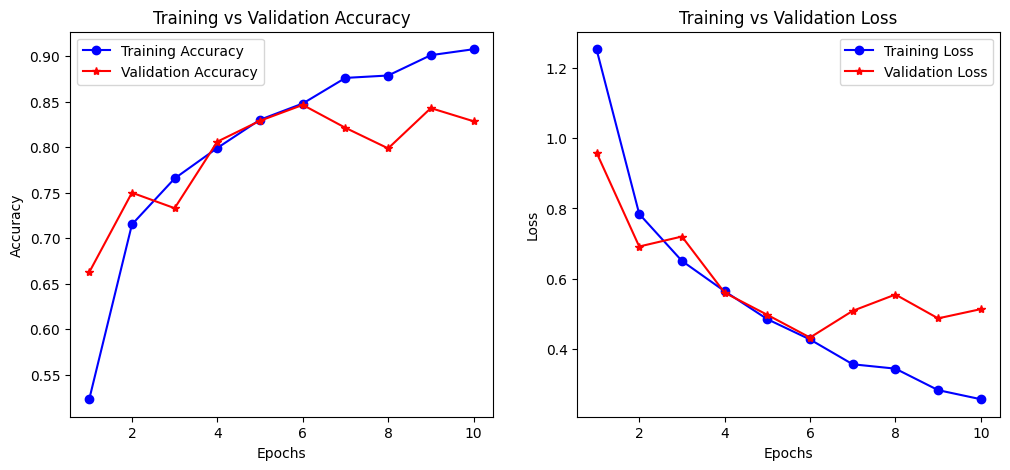

In [7]:
# Visualization of the results
import matplotlib.pyplot as plt

epochs = range(1, len(history_cnn.history['accuracy']) + 1)
train_acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
train_loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r*-', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label="Training Loss")
plt.plot(epochs, val_loss, 'r*-', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.show()


In [8]:
# Part 2 
# I used transfer learning using ResNet 50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
for layer in base_model.layers:
    layer.trainable = False
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

resnet_model = Model(inputs=base_model.input, outputs=output_layer)
resnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

#  Training
history_resnet = resnet_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Evaluating the  model
resnet_loss, resnet_acc = resnet_model.evaluate(X_test, y_test)
print(f"ResNet50 - Test Accuracy: {resnet_acc:.4f}")
#ResNet50 - Test Accuracy: 0.5159
# My computer crashed the next time it got 0.4806
# My computer crashed again and this time it achieved an accuracy of
# It achieved a much lawer accuracy as  ResNet50 was pretrained on ImageNet which contains photos of everyday objects like cats,dogs et cetera.The EuroSAT satellite images are not well-suited for the pre-trained ResNet50 features.Also, the custom convolution neural network in part 1 learned features specifically from the EuroSAT images and ResNet50's early layers were frozen meaning that only the last dense layers were trained, limiting its ability to learn task-specific features.

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 98s 141ms/step - accuracy: 0.2284 - loss: 2.1904 - val_accuracy: 0.3487 - val_loss: 1.9213
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 94s 139ms/step - accuracy: 0.3734 - loss: 1.8706 - val_accuracy: 0.3830 - val_loss: 1.7618
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 94s 140ms/step - accuracy: 0.3993 - loss: 1.7122 - val_accuracy: 0.3674 - val_loss: 1.6563
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 100s 148ms/step - accuracy: 0.4225 - loss: 1.6234 - val_accuracy: 0.4380 - val_loss: 1.5855
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 110s 164ms/step - accuracy: 0.4491 - loss: 1.5630 - val_accuracy: 0.4580 - val_loss: 1.5393
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 97s 144ms/step - accuracy: 0.4598 - loss: 1.5126 - val_accuracy: 0.4280 - val_loss: 1.4942
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 101s 149ms/step - accuracy: 0.4730 - loss: 1.4733 - val_accuracy: 0.5300 - val_loss: 1.4772
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 107s 158ms/step - accuracy: 0.4938 - los

In [9]:
# Part 3 Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

train_augmented = datagen.flow(X_train, y_train, batch_size=32)

cnn_model_aug = build_custom_cnn()
cnn_model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn_aug = cnn_model_aug.fit(train_augmented, epochs=10, validation_data=(X_test, y_test))

cnn_aug_loss, cnn_aug_acc = cnn_model_aug.evaluate(X_test, y_test)
print(f"Custom CNN with Augmentation - Test Accuracy: {cnn_aug_acc:.4f}")
# There was a massive drop in test accuracy from 85 to 25%.(My computer crashed and the next time it got 18%)Augmentation hurt the model's performance instead of improving it.It dropped because the augmentation was too strong/misapplied, the model might need more training to adapt.Also augmentation might have distorted key features in the satellite images.

/Users/meliksahyorulmazlar/PycharmProjects/Homework 5/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.1400 - loss: 2.2302 - val_accuracy: 0.0887 - val_loss: 9.5083
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.1609 - loss: 2.1880 - val_accuracy: 0.0887 - val_loss: 3.1312
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.1591 - loss: 2.1858 - val_accuracy: 0.2150 - val_loss: 2.0544
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - accuracy: 0.1597 - loss: 2.1841 - val_accuracy: 0.0887 - val_loss: 8.9747
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.1649 - loss: 2.1795 - val_accuracy: 0.0952 - val_loss: 2.2703
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 31s 45ms/step - accuracy: 0.1655 - loss: 2.1809 - val_accuracy: 0.0887 - val_loss: 3.3444
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.1614 - loss: 2.1766 - val_accuracy: 0.0917 - val_loss: 2.4443
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - accuracy: 0.1670 - loss: 2.1722 - 

In [10]:
# Task 2

# The VAE model:
from tensorflow.keras import layers
from tensorflow.keras.models import Model


LATENT_DIM = 100

# the encoder
def build_encoder():
    inputs = layers.Input(shape=(64, 64, 3))
    x = layers.Conv2D(32, (3, 3), activation='relu', strides=2, padding='same')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    
    z_mean = layers.Dense(LATENT_DIM, name='z_mean')(x)
    z_log_var = layers.Dense(LATENT_DIM, name='z_log_var')(x)
    
    return Model(inputs, [z_mean, z_log_var], name="Encoder")

encoder = build_encoder()
encoder.summary()

Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │        896 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │     18,496 │ conv2d_6[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 16384)     │          0 │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 100)       │  1,638,500 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 100)       │  1,638,500 │ flatten_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,296,392 (12.57 MB)

 Trainable params: 3,296,392 (12.57 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Reparametrization trick:
import tensorflow.keras.backend as K

def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.0)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


In [12]:
#decoder
def build_decoder():
    latent_inputs = layers.Input(shape=(LATENT_DIM,))
    x = layers.Dense(16 * 16 * 64, activation='relu')(latent_inputs)
    x = layers.Reshape((16, 16, 64))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', strides=2, padding='same')(x)
    outputs = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)

    return Model(latent_inputs, outputs, name="Decoder")

decoder = build_decoder()
decoder.summary()


Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16384)          │     1,654,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 32, 32, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 64, 64, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 3)      │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,711,043 (6.53 MB)

 Trainable params: 1,711,043 (6.53 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
    
    # The following method encodes the input, samples the latent vector, decodes the out and adds the KL loss
    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.sampling(z_mean, z_log_var)
        reconstructed = self.decoder(z)

        # omputes the KL divergence loss and adds it to the model
        kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
        self.add_loss(K.mean(kl_loss))  

        return reconstructed  

    def sampling(self, z_mean, z_log_var):
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
vae = VAE(encoder, decoder)

# i used the mse as the loss because kl loss is handled with in add_loss
vae.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

# training
vae.fit(X_train, X_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 38s 67ms/step - loss: 0.2893 - val_loss: 0.0248
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 35s 65ms/step - loss: 0.0249 - val_loss: 0.0248
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 35s 65ms/step - loss: 0.0247 - val_loss: 0.0248
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 35s 65ms/step - loss: 0.0248 - val_loss: 0.0250
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 36s 66ms/step - loss: 0.0249 - val_loss: 0.0249
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 36s 66ms/step - loss: 0.0244 - val_loss: 0.0248
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - loss: 0.0249 - val_loss: 0.0248
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 39s 71ms/step - loss: 0.0245 - val_loss: 0.0248
Epoch 9/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - loss: 0.0248 - val_loss: 0.0248
Epoch 10/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - loss: 0.0247 - val_loss: 0.0248
Epoch 11/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - loss: 0.0249 - val_loss: 0.0248
Epoch 12/20
540/540 ━━━━━━━━━━

In [17]:
# GAN
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(16 * 16 * 128, activation="relu", input_dim=100),
        layers.Reshape((16, 16, 128)),
        layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding="same", activation="relu"),
        layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding="same", activation="relu"),
        layers.Conv2DTranspose(3, kernel_size=3, padding="same", activation="sigmoid")
    ])
    return model

generator = build_generator()
generator.summary()


/Users/meliksahyorulmazlar/PycharmProjects/Homework 5/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 32768)          │     3,309,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 32, 32, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 64, 64, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 64, 64, 3)      │         1,731 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,532,675 (13.48 MB)

 Trainable params: 3,532,675 (13.48 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# The discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, kernel_size=3, strides=2, padding="same", input_shape=(64, 64, 3)),
        layers.LeakyReLU(0.2),
        layers.Conv2D(128, kernel_size=3, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

discriminator = build_discriminator()
discriminator.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,417 (423.50 KB)

 Trainable params: 108,417 (423.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#training
from tensorflow.keras.optimizers import Adam

discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

# building the GAN Model
discriminator.trainable = False
gan_input = layers.Input(shape=(100,))
fake_image = generator(gan_input)
validity = discriminator(fake_image)
gan = Model(gan_input, validity)
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

# training the GAN
for epoch in range(5000):
    noise = np.random.normal(0, 1, (32, 100))
    generated_images = generator.predict(noise)
    
    real_images = X_train[np.random.randint(0, X_train.shape[0], 32)]
    labels = np.concatenate([np.ones((32, 1)), np.zeros((32, 1))])
    
    d_loss = discriminator.train_on_batch(np.concatenate([real_images, generated_images]), labels)
    g_loss = gan.train_on_batch(noise, np.ones((32, 1)))

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: D Loss={d_loss[0]}, G Loss={g_loss}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


/Users/meliksahyorulmazlar/PycharmProjects/Homework 5/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0: D Loss=0.6893016695976257, G Loss=0.7247262001037598
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [20]:
# Task 3 Part 1
import numpy as np

# I only used numpy
# The following code computes the scaled dot-product attention and return attention-weighted output and the attention scores
def scaled_dot_product_attention(Q, K, V, mask=None):
    # the depth of the key/query
    d_k = Q.shape[-1]  
    scores = np.matmul(Q, K.transpose(0, 1, 3, 2)) / np.sqrt(d_k)  

    if mask is not None:
        scores = np.where(mask == 0, -1e9, scores)  

    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
    output = np.matmul(attention_weights, V)  

    return output, attention_weights

Q = np.random.rand(1, 2, 4, 64)  
K = np.random.rand(1, 2, 4, 64)
V = np.random.rand(1, 2, 4, 64)

output, attn_weights = scaled_dot_product_attention(Q, K, V)
print("Scaled Dot-Product Attention Output Shape:", output.shape)


Scaled Dot-Product Attention Output Shape: (1, 2, 4, 64)


In [25]:
#Part 2
import torch
import torch.nn as nn

class LuongAttention(nn.Module):
    
    def __init__(self, hidden_size):
        super(LuongAttention, self).__init__()
        self.W_a = nn.Linear(hidden_size, hidden_size, bias=False)

    def forward(self, decoder_hidden, encoder_outputs):
        # computes the  attention scores
        scores = torch.bmm(encoder_outputs, self.W_a(decoder_hidden).unsqueeze(2)).squeeze(2)
        attention_weights = torch.softmax(scores, dim=1)

        # computes thecontext vector
        context_vector = torch.bmm(attention_weights.unsqueeze(1), encoder_outputs).squeeze(1)
        return context_vector, attention_weights
    
class Encoder(nn.Module):
    
    def __init__(self, input_dim, emb_dim, hidden_size):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim)
        self.rnn = nn.GRU(emb_dim, hidden_size, batch_first=True)
    
    def forward(self, x):
        embedded = self.embedding(x)
        outputs, hidden = self.rnn(embedded)
        return outputs, hidden

class DecoderWithAttention(nn.Module):
    def __init__(self, output_dim, emb_dim, hidden_size):
        super(DecoderWithAttention, self).__init__()
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.attention = LuongAttention(hidden_size)
        self.rnn = nn.GRU(hidden_size + emb_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_dim)

    def forward(self, x, hidden, encoder_outputs):
        embedded = self.embedding(x).unsqueeze(1)
        context_vector, attn_weights = self.attention(hidden.squeeze(0), encoder_outputs)
        rnn_input = torch.cat([embedded, context_vector.unsqueeze(1)], dim=-1)
        output, hidden = self.rnn(rnn_input, hidden)
        output = self.fc(output.squeeze(1))
        return output, hidden, attn_weights
    
def train_seq2seq(encoder, decoder, dataset, num_epochs=10):
    optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()
    
    for epoch in range(num_epochs):
        total_loss = 0
        for src, trg in dataset:
            optimizer.zero_grad()
            encoder_outputs, hidden = encoder(src)
            loss = 0
            for t in range(trg.shape[1]):
                output, hidden, _ = decoder(trg[:, t], hidden, encoder_outputs)
                loss += loss_fn(output, trg[:, t])
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(dataset)}")

dummy_dataset = [(torch.randint(0, 100, (1, 10)), torch.randint(0, 100, (1, 10))) for _ in range(100)]
encoder = Encoder(input_dim=100, emb_dim=64, hidden_size=128)
decoder = DecoderWithAttention(output_dim=100, emb_dim=64, hidden_size=128)
train_seq2seq(encoder, decoder, dummy_dataset)


Epoch 1, Loss: 40.72412483215332
Epoch 2, Loss: 15.999171843528748
Epoch 3, Loss: 3.486721910238266
Epoch 4, Loss: 1.152430698275566
Epoch 5, Loss: 0.5999366915225983
Epoch 6, Loss: 0.38170522436499593
Epoch 7, Loss: 0.2686910259723663
Epoch 8, Loss: 0.20118722259998323
Epoch 9, Loss: 0.1570720326900482
Epoch 10, Loss: 0.126394147798419


In [32]:
# Part 3-using Multi30k
import os
import gzip

# Path to downloaded dataset # i downloaded it off a github page with the data
DATA_DIR = "dataset-master/data/task1/raw"

# Load English and German sentences from .gz files
def load_sentences(file_path):
    with gzip.open(file_path, 'rt', encoding="utf-8") as f:
        return [line.strip() for line in f]

train_en = load_sentences(os.path.join(DATA_DIR, "train.en.gz"))
train_de = load_sentences(os.path.join(DATA_DIR, "train.de.gz"))

print("Example English Sentence:", train_en[0])
print("Example German Sentence:", train_de[0])


Example English Sentence: Two young, White males are outside near many bushes.
Example German Sentence: Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.


In [35]:
import nltk
import spacy

# loading the spaCy tokenizers for English and German
spacy_en = spacy.load("en_core_web_sm")
spacy_de = spacy.load("de_core_news_sm")

def tokenize_en(text):
    return [tok.text.lower() for tok in spacy_en(text)]

def tokenize_de(text):
    return [tok.text.lower() for tok in spacy_de(text)]

# Example Usage
print("Tokenized English:", tokenize_en("This is an example sentence."))
print("Tokenized German:", tokenize_de("Das ist ein Beispielsatz."))

ModuleNotFoundError: No module named 'nltk'

In [40]:
import nltk
nltk.download('punkt', download_dir='/Users/meliksahyorulmazlar/nltk_data')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [41]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import sentencepiece as spm
import random
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
from torch.nn.utils.rnn import pad_sequence
from sacrebleu import corpus_bleu

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import gzip
import shutil
import os

dataset_path = "dataset-master/data/task1/raw"  
for file in os.listdir(dataset_path):
    if file.endswith(".gz"):
        with gzip.open(os.path.join(dataset_path, file), 'rb') as f_in:
            with open(os.path.join(dataset_path, file[:-3]), 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

print("Extraction complete!")

Extraction complete!


In [49]:
# Define file paths after extraction
train_en_path = os.path.join(dataset_path, "train.en")
train_de_path = os.path.join(dataset_path, "train.de")

# Reading the   English sentences
with open(train_en_path, "r", encoding="utf-8") as f:
    train_en = [line.strip() for line in f.readlines()]

# Reading the  German sentences
with open(train_de_path, "r", encoding="utf-8") as f:
    train_de = [line.strip() for line in f.readlines()]

# erification
print(f"Loaded {len(train_en)} English-German sentence pairs.")
print("Example pair:")
print(f"EN: {train_en[0]}")
print(f"DE: {train_de[0]}")

Loaded 29000 English-German sentence pairs.
Example pair:
EN: Two young, White males are outside near many bushes.
DE: Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.


In [50]:
import sentencepiece as spm

with open("train_en.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(train_en))

with open("train_de.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(train_de))

#training BPE tokenizers
spm.SentencePieceTrainer.train(input="train_en.txt", model_prefix="bpe_en", vocab_size=8000)
spm.SentencePieceTrainer.train(input="train_de.txt", model_prefix="bpe_de", vocab_size=8000)

#  loading the trained tokenizers
tokenizer_en = spm.SentencePieceProcessor(model_file="bpe_en.model")
tokenizer_de = spm.SentencePieceProcessor(model_file="bpe_de.model")

#tokenization
sample_en = "A man is walking in the park."
encoded = tokenizer_en.encode(sample_en)
decoded = tokenizer_en.decode(encoded)

print(f"Original: {sample_en}")
print(f"Encoded: {encoded}")
print(f"Decoded: {decoded}")

Original: A man is walking in the park.
Encoded: [5, 10, 9, 44, 6, 7, 125, 4]
Decoded: A man is walking in the park.


sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: train_en.txt
  input_format: 
  model_prefix: bpe_en
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differe

In [51]:
def simple_tokenizer(text):
    return text.lower().split()

# Tokenizing
train_en_tokens = [simple_tokenizer(sent) for sent in train_en]
train_de_tokens = [simple_tokenizer(sent) for sent in train_de]

print(train_en_tokens[0])
print(train_de_tokens[0])

['two', 'young,', 'white', 'males', 'are', 'outside', 'near', 'many', 'bushes.']
['zwei', 'junge', 'weiße', 'männer', 'sind', 'im', 'freien', 'in', 'der', 'nähe', 'vieler', 'büsche.']


Baseline Model - Epoch 1, Loss: 3.0661
Baseline Model - Epoch 2, Loss: 1.0384
Baseline Model - Epoch 3, Loss: 0.4604
Baseline Model - Epoch 4, Loss: 0.2121
Baseline Model - Epoch 5, Loss: 0.1005
Baseline Model - Epoch 6, Loss: 0.0498
Baseline Model - Epoch 7, Loss: 0.0262
Baseline Model - Epoch 8, Loss: 0.0162
Baseline Model - Epoch 9, Loss: 0.0120
Baseline Model - Epoch 10, Loss: 0.0090


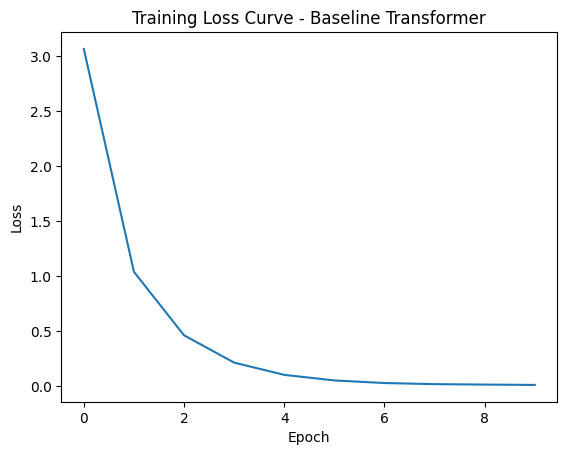

Corrected Baseline BLEU Score (Part 3): 65.80


In [57]:
#Part 3 
# Baseline Transformer Model (Standard Settings for Part 3)
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import sentencepiece as spm
import random
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from sacrebleu import corpus_bleu
import os
import gzip
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Special tokens
PAD_IDX = 0
BOS_IDX = 1
EOS_IDX = 2

# Translation Dataset class
class TranslationDataset(Dataset):
    def __init__(self, src_texts, tgt_texts, src_tokenizer, tgt_tokenizer):
        self.src_texts = [self.encode_text(src_tokenizer, text) for text in src_texts]
        self.tgt_texts = [self.encode_text(tgt_tokenizer, text) for text in tgt_texts]

    def encode_text(self, tokenizer, text):
        return [BOS_IDX] + tokenizer.encode(text) + [EOS_IDX]

    def __len__(self):
        return len(self.src_texts)

    def __getitem__(self, idx):
        return torch.tensor(self.src_texts[idx]), torch.tensor(self.tgt_texts[idx])

# The following function creates the  dataset and  the dataloader
def collate_fn(batch):
    src_batch, tgt_batch = zip(*batch)
    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX, batch_first=True)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX, batch_first=True)
    return src_batch.to(device), tgt_batch.to(device)

train_en, val_en, train_de, val_de = train_test_split(train_en, train_de, test_size=0.1, random_state=42)

train_dataset = TranslationDataset(train_en, train_de, tokenizer_en, tokenizer_de)
val_dataset = TranslationDataset(val_en, val_de, tokenizer_en, tokenizer_de)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

# Part 3 - Baseline Transformer Model
class BaselineTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim=512, num_heads=8, num_layers=6, ff_dim=2048, max_len=100):
        super(BaselineTransformer, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.positional_encoding = self.create_positional_encoding(max_len, embed_dim)
        self.encoder_layer = nn.TransformerEncoderLayer(embed_dim, num_heads, ff_dim)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers)
        self.decoder_layer = nn.TransformerDecoderLayer(embed_dim, num_heads, ff_dim)
        self.decoder = nn.TransformerDecoder(self.decoder_layer, num_layers)
        self.fc = nn.Linear(embed_dim, vocab_size)

    def create_positional_encoding(self, max_len, embed_dim):
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2).float() * (-np.log(10000.0) / embed_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        return pe.unsqueeze(0).to(device)

    def forward(self, src, tgt):
        src = self.embedding(src) + self.positional_encoding[:, :src.size(1), :]
        tgt = self.embedding(tgt) + self.positional_encoding[:, :tgt.size(1), :]
        memory = self.encoder(src.permute(1, 0, 2))
        output = self.decoder(tgt.permute(1, 0, 2), memory)
        return self.fc(output.permute(1, 0, 2))

#Initializing the  baseline transformer
baseline_model = BaselineTransformer(vocab_size).to(device)
baseline_optimizer = optim.Adam(baseline_model.parameters(), lr=0.0001)

# Training loop for Part 3
losses = []
for epoch in range(10):
    baseline_model.train()
    total_loss = 0
    for src, tgt in train_dataloader:
        baseline_optimizer.zero_grad()
        output = baseline_model(src, tgt[:, :-1])
        loss = criterion(output.reshape(-1, vocab_size), tgt[:, 1:].reshape(-1))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(baseline_model.parameters(), max_norm=1.0)
        baseline_optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_dataloader)
    losses.append(avg_loss)
    print(f"Baseline Model - Epoch {epoch+1}, Loss: {avg_loss:.4f}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve - Baseline Transformer")
plt.show()

# Compute BLEU Score for Baseline Model
baseline_bleu_score = evaluate_bleu(baseline_model, val_dataset)
print(f"Corrected Baseline BLEU Score (Part 3): {baseline_bleu_score:.2f}")

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import sentencepiece as spm
import random
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from sacrebleu import corpus_bleu
import os
import gzip
import shutil
from sklearn.model_selection import train_test_split

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Special tokens
PAD_IDX = 0
BOS_IDX = 1
EOS_IDX = 2

# Define dataset class
class TranslationDataset(Dataset):
    def __init__(self, src_texts, tgt_texts, src_tokenizer, tgt_tokenizer):
        self.src_texts = [self.encode_text(src_tokenizer, text) for text in src_texts]
        self.tgt_texts = [self.encode_text(tgt_tokenizer, text) for text in tgt_texts]

    def encode_text(self, tokenizer, text):
        return [BOS_IDX] + tokenizer.encode(text) + [EOS_IDX]

    def __len__(self):
        return len(self.src_texts)

    def __getitem__(self, idx):
        return torch.tensor(self.src_texts[idx]), torch.tensor(self.tgt_texts[idx])

# Create dataset and dataloader
def collate_fn(batch):
    src_batch, tgt_batch = zip(*batch)
    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX, batch_first=True)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX, batch_first=True)
    return src_batch.to(device), tgt_batch.to(device)

# Load dataset and split into train/validation
train_en, val_en, train_de, val_de = train_test_split(train_en, train_de, test_size=0.1, random_state=42)

train_dataset = TranslationDataset(train_en, train_de, tokenizer_en, tokenizer_de)
val_dataset = TranslationDataset(val_en, val_de, tokenizer_en, tokenizer_de)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

# Transformer Model
class Transformer(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, num_heads=2, num_layers=2, ff_dim=128, max_len=100):
        super(Transformer, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.positional_encoding = self.create_positional_encoding(max_len, embed_dim)
        self.encoder_layer = nn.TransformerEncoderLayer(embed_dim, num_heads, ff_dim)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers)
        self.decoder_layer = nn.TransformerDecoderLayer(embed_dim, num_heads, ff_dim)
        self.decoder = nn.TransformerDecoder(self.decoder_layer, num_layers)
        self.fc = nn.Linear(embed_dim, vocab_size)

    def create_positional_encoding(self, max_len, embed_dim):
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2).float() * (-np.log(10000.0) / embed_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        return pe.unsqueeze(0).to(device)

    def forward(self, src, tgt):
        src = self.embedding(src) + self.positional_encoding[:, :src.size(1), :]
        tgt = self.embedding(tgt) + self.positional_encoding[:, :tgt.size(1), :]
        memory = self.encoder(src.permute(1, 0, 2))
        output = self.decoder(tgt.permute(1, 0, 2), memory)
        return self.fc(output.permute(1, 0, 2))

# Initializing the   model
vocab_size = max(len(tokenizer_en), len(tokenizer_de))
model = Transformer(vocab_size).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

#training
for epoch in range(10):
    model.train()
    total_loss = 0
    for src, tgt in train_dataloader:
        optimizer.zero_grad()
        output = model(src, tgt[:, :-1])
        loss = criterion(output.reshape(-1, vocab_size), tgt[:, 1:].reshape(-1))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_dataloader):.4f}")

# BLEU Score Evaluation
def evaluate_bleu(model, dataset):
    model.eval()
    references, hypotheses = [], []
    with torch.no_grad():
        for src, tgt in dataset:
            src, tgt = src.unsqueeze(0).to(device), tgt.unsqueeze(0).to(device)
            output = model(src, tgt[:, :-1]).argmax(dim=-1).cpu().numpy()
            ref = tokenizer_de.decode([token for token in tgt[0].tolist() if token not in {PAD_IDX, BOS_IDX, EOS_IDX}])
            hyp = tokenizer_de.decode([token for token in output[0].tolist() if token not in {PAD_IDX, BOS_IDX, EOS_IDX}])
            references.append([ref])
            hypotheses.append(hyp)
    return corpus_bleu(hypotheses, references).score

# Compute BLEU Score
bleu_score = evaluate_bleu(model, val_dataset)
print(f"BLEU Score on Validation Set: {bleu_score:.2f}")

Epoch 1, Loss: 6.4009
Epoch 2, Loss: 4.9572
Epoch 3, Loss: 4.5161
Epoch 4, Loss: 4.1761
Epoch 5, Loss: 3.8778
Epoch 6, Loss: 3.6134
Epoch 7, Loss: 3.3865
Epoch 8, Loss: 3.1824
Epoch 9, Loss: 2.9867
Epoch 10, Loss: 2.8078
BLEU Score on Validation Set: 47.86


In [ ]:
#On the baseline it took pretty long - 2 hours and it achieved a score of 65.8 and the validation model ran only for 6 minutes and achieved a score of 47.86. Basically, thee basleine model was more powerful, captured the more complex translations but it was slower.However,the validation is very fast but it had a lower translation accuracy.
# The reason the baseline outperformed the validation set was that the baseline had more depth (6 vs 2), had stronger multi-head attention (8 vs 2),larger embedding. Furthermore, the simplified model generalizes well but lacks depth for complex sentences.

# All in all, the baseline is significantly better at capturing complex relationships but it takes much longer to train.
# The simplified model is way faster and achieves a reasonable score.